## GOAL: Using Indian Census Data from 2011 to answer the given questions

The dataset consists of 118 attributes that have been mentioned below. 

### Data Cleaning:

1. There were no missing values in the dataset.
2. Only the names of certain states have been altered to match with the OLD NAMES.
3. (& ampersand) was changed to "AND"

### Importing required libraries and data

In [29]:

import pandas as pd
import numpy as np
import seaborn as sb
import math
%matplotlib inline
from itertools import groupby
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib.cm
import operator
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [28]:
census_data = pd.read_csv("A:/census-data/india-districts-census-2011.csv")

### An overview of the data available

In [5]:
census_data.head(3)

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU & KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU & KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU & KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242


In [30]:
census_data = census_data.replace(['JAMMU & KASHMIR', 'ODISHA', 'ANDAMAN & NICOBAR ISLANDS', 'PUDUCHERRY', 'DADRA & NAGAR HAVELI', 'DAMAN & DIU'], ['JAMMU AND KASHMIR', 'ORISSA', 'ANDAMAN AND NICOBAR ISLANDS', 'PONDICHERRY', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU'])

In [25]:
census_data.shape

(640, 112)

### Checking for null values

There are no null values in the data, as shown below.

In [8]:
nulls = census_data.isnull().sum()
nulls[nulls>0]

Series([], dtype: int64)

### Detailed view of the data

The describe() method gives a detailed view of the data, where the min, max, mean and other metrics mentioned below can be observed. It gives an intuition as to what kind of data we are working with in our scenario.

The names of all columns in our dataset have been mentioned below.

In [9]:
census_data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


In [5]:
column_names = census_data.columns.values
column_names

array(['District code', 'State name', 'District name', 'Population',
       'Male', 'Female', 'Literate', 'Male_Literate', 'Female_Literate',
       'SC', 'Male_SC', 'Female_SC', 'ST', 'Male_ST', 'Female_ST',
       'Workers', 'Male_Workers', 'Female_Workers', 'Main_Workers',
       'Marginal_Workers', 'Non_Workers', 'Cultivator_Workers',
       'Agricultural_Workers', 'Household_Workers', 'Other_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Others_Religions', 'Religion_Not_Stated', 'LPG_or_PNG_Households',
       'Housholds_with_Electric_Lighting', 'Households_with_Internet',
       'Households_with_Computer', 'Rural_Households', 'Urban_Households',
       'Households', 'Below_Primary_Education', 'Primary_Education',
       'Middle_Education', 'Secondary_Education', 'Higher_Education',
       'Graduate_Education', 'Other_Education', 'Literate_Education',
       'Illiterate_Education', 'Total_Education', 'Age_Group_0_29',
       'Age_Group_3

### Number of states

35 (States and Union Territories).

One thing to be noted here is that Telangana state is not mentioned, as it was not formed as of 2011

In [11]:
print(census_data.groupby('State name').size())

State name
ANDAMAN AND NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHHATTISGARH                   18
DADRA AND NAGAR HAVELI          1
DAMAN AND DIU                   2
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL PRADESH               12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         8
NAGALAND                       11
NCT OF DELHI                    9
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33
SIK

In [12]:

print(len(census_data.groupby('State name').size()))

35


# 1. Indian States with the least Literacy rate

For finding the literacy rate for each state, we calculated the literacy rate by dividing total literate population by total population. This has been stored in literacy_rate. 

Also, since we are mainly interested in the states with lower literacy rates, we have also checked for those top 7 states with the least literacy compared to other ones. 

### Assumptions:

1. According to the definition of literacy rate on the official wikipedia page (please see: https://en.wikipedia.org/wiki/Literacy_in_India), it has been mentioned that literacy rate is calcuated for ages 7 and above, but in our dataset, we do not have a clear division as such. This is the reason why we simply considered the toal population as opposed to the actual population to be considered. 

2. All the Union Territories of our country have been included in this, just to maintain uniformity among the data. There are 7 Union Territories and 28 states in total.



In [31]:
#Literacy Rate calculation
#Literacy Rate = (Total literate population in a state above 7 years of age)/(Total population in the state above 7 years of age)*100
literacy_rate=[]
states_data = census_data.groupby('State name')

for name, group in states_data:
    total_pop = 0
    literate_pop = 0
    
    for row in group.iterrows():
        total_pop = total_pop + row[1][3]
        literate_pop = literate_pop + row[1][6]
        
    
    lit_rate = (literate_pop)/(total_pop)*100
    
    literacy_rate.append((name, lit_rate))

print(literacy_rate)

sorted_literacy=[]
least_literacy=[]
sorted_literacy = sorted(literacy_rate, key=operator.itemgetter(1))
least_literacy = sorted_literacy[:7]
print()

[('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791), ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746), ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666), ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531), ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207), ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555), ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127), ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107), ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995), ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153), ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PUNJAB', 67.42929419668246), ('

### State with maximum literacy rate

In [32]:
print(max(literacy_rate, key=lambda item: item[1]))

('KERALA', 84.2237101824127)


### State with least literacy rate

In [33]:
print(min(least_literacy, key=lambda item: item[1]))

('BIHAR', 50.43691584466746)


## Creating the geomap for Indian states and their literacy rates

This geomap has been created using BaseMap, a sub-package present in matplotlib. This does not come in-built with matplotliba nd has to be installed separately. 

To impose the boundaries of Indian states, we have used the shapefile taken from the website (please see: https://www.arcgis.com/home/item.html?id=cf9b387de48248a687aafdd4cdff1127). This gives us a clear view of how the states are divided on the map and can be represented with for better effect. 

As for the latitute and longitude values, we have used the website (please see: https://gps-coordinates.org/india-latitude.php) to find the middle point and the boundary latitute and longitudes. 

The colors for water bodies have been chosena ccording to geomap standards - cyan blue. 


C:\Users\sanga\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\sanga\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1710: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


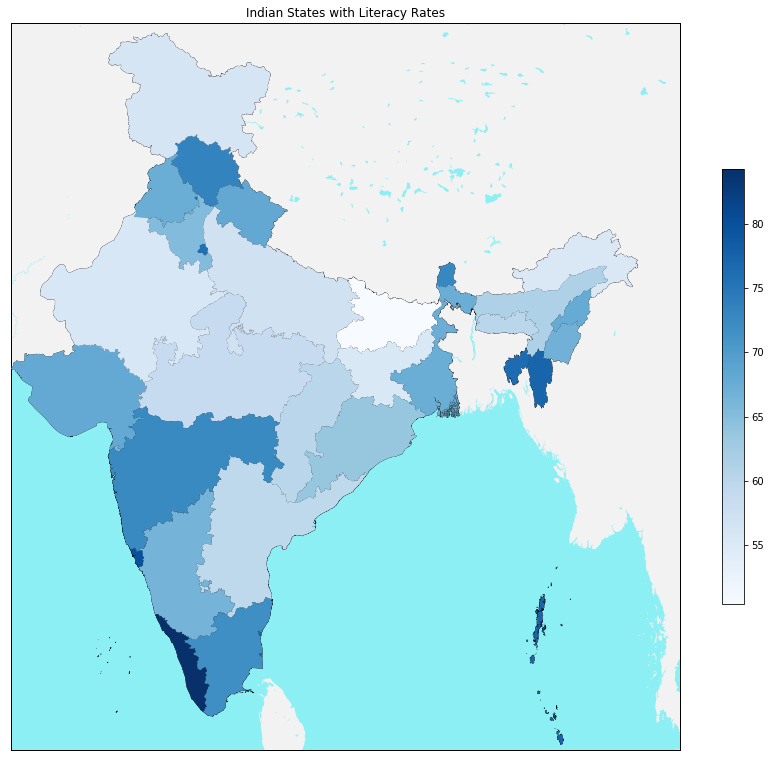

In [16]:
#Geo map with literacy rates
#Created using Basemap
#MAP CREATION

fig, ax = plt.subplots(figsize=(15,20))
ax.set_title("Indian States with Literacy Rates")

#The Basemap function, resultion is set to high
my_map = Basemap(resolution='h',
                 projection='merc',
                 lat_0= 20.59, 
                 lon_0= 78.96,
                 llcrnrlon= 68.13, 
                 llcrnrlat= 6.54, 
                 urcrnrlon= 99.49, 
                 urcrnrlat= 37.56)

my_map.drawmapboundary(fill_color='#8beff3')

my_map.fillcontinents(color='#f2f2f2',lake_color='#8beff3')


#DRAWING STATES
my_map.readshapefile("A:/census-data/India_SHP/INDIA", "INDIA", drawbounds=True)

#Mapping shapes to statename and literacy rate
literac_rate = []

for state_info in my_map.INDIA_info:
    state = state_info['ST_NAME'].upper()
    rate = 0
    
    for i in literacy_rate:
        if i[0] == state:
            rate = i[1]
            break
    literac_rate.append(rate)
    
#Getting a data frame together, which consists of the shape reference, area and the literacy rate of each state.
shape_frame = pd.DataFrame({
        'shape': [Polygon(np.array(shape), True) for shape in my_map.INDIA],
        'area': [area['ST_NAME'] for area in my_map.INDIA_info],
        'literacy_rate' : literac_rate
    })


#COLORING THE MAP
#get shapes together
shapes = [Polygon(np.array(shape), True) for shape in my_map.INDIA]

colored_map = plt.get_cmap('Blues')

#Create patches on the map
pc = PatchCollection(shapes, zorder=10)
norm = Normalize()

#Color filling acc to literacy rate
pc.set_facecolor(colored_map(norm(shape_frame['literacy_rate'].fillna(0).values)))
ax.add_collection(pc)

#Add color intensities
mapper = matplotlib.cm.ScalarMappable(cmap=colored_map)
mapper.set_array(literac_rate)
plt.colorbar(mapper, shrink=0.4)

plt.rcParams['figure.figsize'] = (30,30)
plt.rcParams.update({'font.size': 15})
plt.show()



### Geomap of Indian states with Least Literacy rate

The same procedure has been followed as above, but in this map, we tried to represent only those 7 states that have the least literacy rates compared to the other states in our country.

C:\Users\sanga\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\sanga\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1710: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


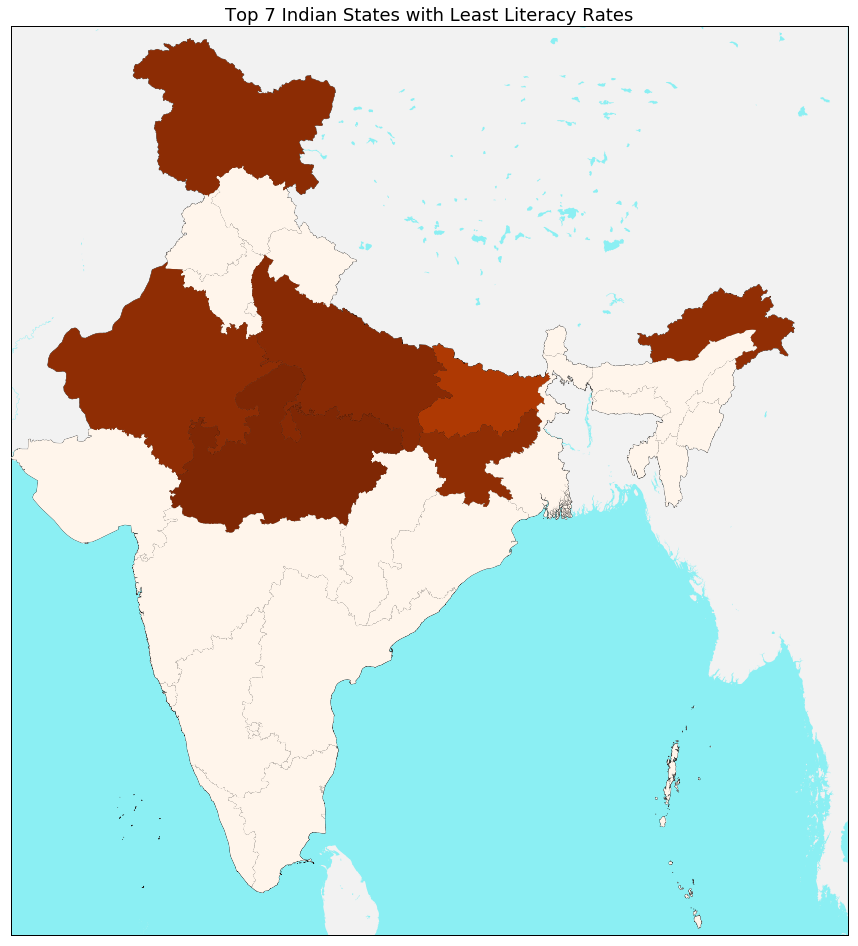

In [17]:
#Geo map with literacy rates
#Created using Basemap
#MAP CREATION

fig, ax = plt.subplots(figsize=(15,20))
ax.set_title("Top 7 Indian States with Least Literacy Rates")

my_map = Basemap(resolution='f',
                 projection='merc',
                 lat_0= 20.59, 
                 lon_0= 78.96,
                 llcrnrlon= 68.13, 
                 llcrnrlat= 6.54, 
                 urcrnrlon= 99.49, 
                 urcrnrlat= 37.56)

my_map.drawmapboundary(fill_color='#8beff3')

my_map.fillcontinents(color='#f2f2f2',lake_color='#8beff3')


#DRAWING STATES
my_map.readshapefile("A:/census-data/India_SHP/INDIA", "INDIA", drawbounds=True)

#Mapping shapes to statename and literacy rate
literac_rate = []

for state_info in my_map.INDIA_info:
    state = state_info['ST_NAME'].upper()
    rate = 0
    
    for i in least_literacy:
        if i[0] == state:
            rate = i[1]
            break
    literac_rate.append(rate)
    

shape_frame = pd.DataFrame({
        'shape': [Polygon(np.array(shape), True) for shape in my_map.INDIA],
        'area': [area['ST_NAME'] for area in my_map.INDIA_info],
        'literacy_rate' : literac_rate
    })


#COLORING THE MAP
#get shapes together
shapes = [Polygon(np.array(shape), True) for shape in my_map.INDIA]

colored_map = plt.get_cmap('Oranges')

#Create patches on the map
pc = PatchCollection(shapes, zorder=10)
norm = Normalize()

#Color filling acc to literacy rate
pc.set_facecolor(colored_map(norm(shape_frame['literacy_rate'].fillna(0).values)))
ax.add_collection(pc)

#Add color intensities
mapper = matplotlib.cm.ScalarMappable(cmap=colored_map)
mapper.set_array(literac_rate)


plt.rcParams['figure.figsize'] = (15,20)
plt.rcParams.update({'font.size': 15})
plt.show()

In [18]:
print("Top 7 Indian states with low literacy")
print(least_literacy)

Top 7 Indian states with low literacy
[('BIHAR', 50.43691584466746), ('ARUNACHAL PRADESH', 55.35810170647822), ('JHARKHAND', 55.55958090869887), ('RAJASTHAN', 55.8368413272501), ('JAMMU AND KASHMIR', 56.351669069128555), ('UTTAR PRADESH', 57.252497231890196), ('MADHYA PRADESH', 59.00186114469107)]


## Top 7 Indian States with Least Literacy:

#### Bihar, Arunachal Pradesh, Jharkhand, Rajasthan, Jammu and Kashmir, Uttar Pradesh, Madhya Pradesh

One interesting observation here is that a majority of the states here are present in the Northern part of the country. 

Also, it would be very interesting to see what factors drive the literacy rate in these states, and what attributes can be focused on to improve the literate population in these regions. It should also be considered that some districts in these states must be contributing the most to their present metrics, which can be developed further in the future. 

# 2. Similarities between districts in Bihar and Tamil Nadu

To find the similarity measure between the districts in Bihar and Tamil Nadu (TN), we have first created two dataframes for each state and dropped the district codes and state names - while only considering the District names and comparing their data. 

#### As for the similairty measure - we have used the Cosine Similarity measure

The Cosine similarity measure is one of the similairty measuring techniques between two non-zero vectors and the angle between them. If the angle is 0 (cos0 = 1) then it indicates that they are similar to each other as opposed to the angle of 90 (which is cos90 = 1)

After finding the cosine similarities, we have plotted a heatmap to visualize the most similar districts and the ones that are not similar at all.

In [98]:
#2. Similarity between Bihar and Tamil Nadu
df_Bihar=census_data[(census_data['State name']=='BIHAR')]
df_Tamil= census_data[(census_data['State name']=='TAMIL NADU')]


df_Bihar.drop(['District code','State name'],axis=1,inplace=True)
df_Tamil.drop(['District code','State name'],axis=1,inplace=True)

C:\Users\sanga\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sanga\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [99]:
df_Bihar.head(1)

,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
202,Pashchim Champaran,3935042,2061110,1873932,1759481,1091226,668255,553944,289191,264753,...,621,1968,138,21,159,30,49,79,40,3181


In [100]:
df_Tamil.head(1)

,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
601,Thiruvallur,3728104,1876062,1852042,2791721,1495711,1296010,821646,410526,411120,...,1732,3672,1137,455,1592,472,876,1348,580,7731


In [101]:
df_Bihar.set_index('District name',inplace=True)
df_Tamil.set_index('District name',inplace=True)

In [108]:
from sklearn.metrics.pairwise import cosine_similarity
cos = cosine_similarity(df_Bihar,df_Tamil)


In [64]:
cos.shape

(38, 32)

In [65]:
df_Bihar.shape

(38, 115)

In [66]:
df_Tamil.shape

(32, 115)

In [109]:
#Creating the dataframe that holds index and column values for Bihar and TN respectively. 
comparison = pd.DataFrame(cos, index=df_Bihar.index, columns=df_Tamil.index)
comparison

,Thiruvallur,Chennai,Kancheepuram,Vellore,Tiruvannamalai,Viluppuram,Salem,Namakkal,Erode,The Nilgiris,...,Theni,Virudhunagar,Ramanathapuram,Thoothukkudi,Tirunelveli,Kanniyakumari,Dharmapuri,Krishnagiri,Coimbatore,Tiruppur
Pashchim Champaran,0.930154,0.900444,0.930616,0.951022,0.957777,0.959996,0.944474,0.933559,0.931483,0.920131,...,0.940796,0.933702,0.945462,0.932166,0.939509,0.888325,0.960726,0.960388,0.911879,0.922706
Purba Champaran,0.934954,0.906378,0.935248,0.955651,0.960188,0.961851,0.948499,0.937612,0.935308,0.923970,...,0.944228,0.939007,0.951386,0.938331,0.944354,0.895939,0.963876,0.964367,0.917001,0.927218
Sheohar,0.926291,0.892338,0.926548,0.945252,0.952604,0.955616,0.943243,0.931534,0.930385,0.912126,...,0.936321,0.930892,0.933956,0.926405,0.933657,0.878838,0.959933,0.958196,0.907180,0.920219
Sitamarhi,0.922128,0.890530,0.922420,0.942629,0.948401,0.951050,0.939014,0.926132,0.925501,0.909535,...,0.931446,0.926515,0.933012,0.923195,0.931182,0.879984,0.956257,0.955482,0.903463,0.915812
Madhubani,0.938853,0.909163,0.939260,0.959816,0.966273,0.968294,0.953920,0.942982,0.940337,0.928899,...,0.948585,0.943652,0.954365,0.941918,0.948727,0.898751,0.970146,0.969671,0.920441,0.931288
Supaul,0.923651,0.890209,0.924585,0.946278,0.956457,0.959605,0.942142,0.930730,0.929393,0.913109,...,0.936542,0.929374,0.936070,0.925247,0.934045,0.877271,0.961457,0.959259,0.904668,0.918484
Araria,0.898677,0.870683,0.899980,0.927280,0.932105,0.935191,0.917017,0.904025,0.905194,0.896348,...,0.912505,0.904689,0.921412,0.906185,0.917232,0.870218,0.937004,0.937256,0.881682,0.894785
Kishanganj,0.857802,0.837283,0.859220,0.887786,0.884029,0.886525,0.871072,0.856154,0.858720,0.858960,...,0.866562,0.859713,0.887401,0.869223,0.880459,0.848714,0.889064,0.893385,0.842275,0.851493
Purnia,0.905096,0.876351,0.906072,0.930480,0.934901,0.937985,0.922399,0.908728,0.909263,0.898272,...,0.916428,0.908579,0.922239,0.909005,0.919314,0.871195,0.940979,0.941102,0.887205,0.899403
Katihar,0.898602,0.872605,0.899498,0.925017,0.926505,0.929306,0.914272,0.899675,0.900645,0.892609,...,0.908747,0.900963,0.917620,0.904150,0.914369,0.872464,0.932158,0.933931,0.881135,0.891875


In [106]:
del comparison.index.name
del comparison.columns.name

In [110]:
comparison.describe()

,Thiruvallur,Chennai,Kancheepuram,Vellore,Tiruvannamalai,Viluppuram,Salem,Namakkal,Erode,The Nilgiris,...,Theni,Virudhunagar,Ramanathapuram,Thoothukkudi,Tirunelveli,Kanniyakumari,Dharmapuri,Krishnagiri,Coimbatore,Tiruppur
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.936014,0.908855,0.936442,0.955290,0.958505,0.960640,0.946829,0.935221,0.932265,0.924508,...,0.942268,0.937021,0.947600,0.936564,0.942122,0.895765,0.960942,0.962170,0.916912,0.925206
std,0.020243,0.021955,0.019953,0.016757,0.016437,0.016100,0.016987,0.018018,0.016336,0.017759,...,0.017614,0.018488,0.017003,0.017976,0.015556,0.017754,0.015009,0.014942,0.019774,0.017531
min,0.857802,0.837283,0.859220,0.887786,0.884029,0.886525,0.871072,0.856154,0.858720,0.858960,...,0.866562,0.859713,0.887401,0.869223,0.880459,0.848714,0.889064,0.893385,0.842275,0.851493
25%,0.928239,0.897239,0.928722,0.948753,0.956516,0.959657,0.943539,0.931462,0.929641,0.915360,...,0.936858,0.931296,0.937468,0.928377,0.935263,0.884758,0.960106,0.959541,0.908142,0.919933
50%,0.943224,0.915699,0.943522,0.961712,0.965280,0.966988,0.952756,0.941398,0.937576,0.929452,...,0.947888,0.943527,0.954267,0.941980,0.947387,0.897616,0.965906,0.967988,0.923425,0.930731
75%,0.948146,0.923875,0.948393,0.965374,0.967426,0.969439,0.956235,0.945271,0.940845,0.935442,...,0.952557,0.947250,0.958477,0.947858,0.951372,0.908708,0.968659,0.970121,0.928458,0.934637
max,0.962200,0.939148,0.961925,0.973413,0.971767,0.972797,0.965441,0.954627,0.950995,0.945431,...,0.961503,0.957765,0.967118,0.957684,0.960232,0.924829,0.972897,0.976358,0.944092,0.947646


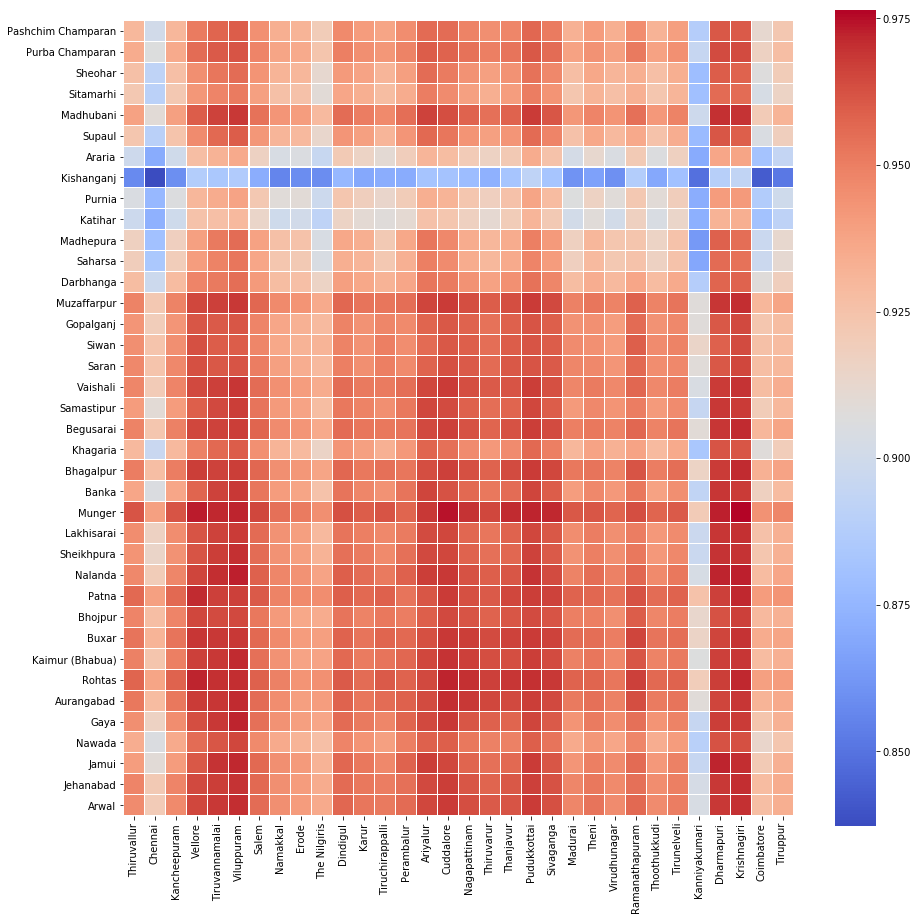

In [111]:
matplotlib.rcParams['figure.figsize'] = (15, 15)
sb.heatmap(comparison, square=True, cmap='coolwarm', linewidths=0.05)

#### It can be observed from the plotted heatmap that:
    1. (Kanniyakumari) is the least similar to all districts in Bihar
    2. (Kishanganj) in Bihar is the least similar to districts in TN
    3. (Dharmapuri and Krishnagiri) in TN are most similar to (Munger and Madhubani) in Bihar

# 3. Mobile Penetration Rates and Agricultural Workers

For this case, we first got the separate data for households with mobile phones and the population of agricultural workers in different lists. 

It was found out that UTTAR PRADESH was the state that had the "most number of households with mobile phones" and the most number of "agricultutal workers"

### Assumptions:

1. The first assumption made is that 'households with mobile phones' and 'population of agricultutal workers' are two metrics that can be compared - because we do not have any strict confirmation that says that the households are in rural/urban areas, since most of the agricultural work is carried out in the rural parts of the state. 

2. Union Territories have also been considered as states - however, in the end - we have chose to ignore those with 0 or very less agricultutal workers. For example, Lakshadweep has 0 agri workers but there are mobile users. 



In [174]:
#3. Mobile Penetration Rates and Agricultutal Workers
states_data = census_data.groupby('State name')

states_data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629
22,23,HIMACHAL PRADESH,Chamba,519080,261320,257760,323842,186064,137778,111690,...,222,498,72,38,110,49,79,128,97,950
23,24,HIMACHAL PRADESH,Kangra,1510075,750591,759484,1152640,606443,546197,319385,...,706,1506,252,101,353,127,206,333,369,2878
24,25,HIMACHAL PRADESH,Lahul & Spiti,31564,16588,14976,21845,12897,8948,2235,...,17,36,6,2,8,3,5,8,9,67
25,26,HIMACHAL PRADESH,Kullu,437903,225452,212451,307672,174550,133122,122659,...,205,444,70,35,105,41,67,108,100,854
26,27,HIMACHAL PRADESH,Mandi,999777,498065,501712,723747,393669,330078,293739,...,431,966,131,77,208,93,152,245,190,1842


In [177]:
#Getting separate data for mobile users and agricultural workers in each state
mobile_users=[]
agricultural_workers=[]

for name, group in states_data:
    total_mobile_users=0
    total_agricultural_workers=0
    
    for row in group.iterrows():
        total_mobile_users = total_mobile_users + row[1][59]
        total_agricultural_workers = total_agricultural_workers + row[1][22]
    
    mobile_users.append((name, total_mobile_users))
    agricultural_workers.append((name, total_agricultural_workers))

print(max(mobile_users, key=lambda item: item[1]))
print(max(agricultural_workers, key=lambda item: item[1]))

('UTTAR PRADESH', 20149607)
('UTTAR PRADESH', 19939223)


In [180]:
#Combining both the lists into a data frame
mobile_penetration = pd.DataFrame({
        'State' : [i[0] for i in mobile_users],
        'Households with Mobiles' : [i[1] for i in mobile_users],
        'Agricultural Workers' : [i[1] for i in agricultural_workers],
    })

print(mobile_penetration)

    Agricultural Workers  Households with Mobiles                        State
0                   4781                    67286  ANDAMAN AND NICOBAR ISLANDS
1               16967754                 11549740               ANDHRA PRADESH
2                  36171                   104094            ARUNACHAL PRADESH
3                1845346                  2766506                        ASSAM
4               18345649                  9773448                        BIHAR
5                   1687                   148411                   CHANDIGARH
6                5091882                  1528665                 CHHATTISGARH
7                  17799                    41837       DADRA AND NAGAR HAVELI
8                    772                    45871                DAMAN AND DIU
9                  26760                   173533                          GOA
10               6839415                  7136827                      GUJARAT
11               1528133                  3157367   

### Calculating the absolute difference between 'households with mobiles' and 'agricultural workers'

In [188]:
mobile_penetration['difference'] = abs(mobile_penetration['Households with Mobiles']-mobile_penetration['Agricultural Workers'])

#### The states with the maximum difference in 'households with Mobiles' and 'agri workers' are:

    1. Bihar
    2. Madhya Pradesh
    3. Andhra Pradesh

In [199]:
mobile_penetration.sort_values('difference',ascending=False).head(3)

,Agricultural Workers,Households with Mobiles,State,difference
4,18345649,9773448,BIHAR,8572201
18,12192267,6074734,MADHYA PRADESH,6117533
1,16967754,11549740,ANDHRA PRADESH,5418014


#### The states with the least difference in 'households with Mobiles' and 'agri workers' are:

    1. Laskhadweep (Union Territory)
    2. Tripura
    3. Meghalaya

In [202]:
mobile_penetration.sort_values('difference',ascending=True).head(3)

,Agricultural Workers,Households with Mobiles,State,difference
17,0,4977,LAKSHADWEEP,4977
31,353618,360143,TRIPURA,6525
21,198364,210473,MEGHALAYA,12109


### Plotting the multi bar plot using matplotlib 

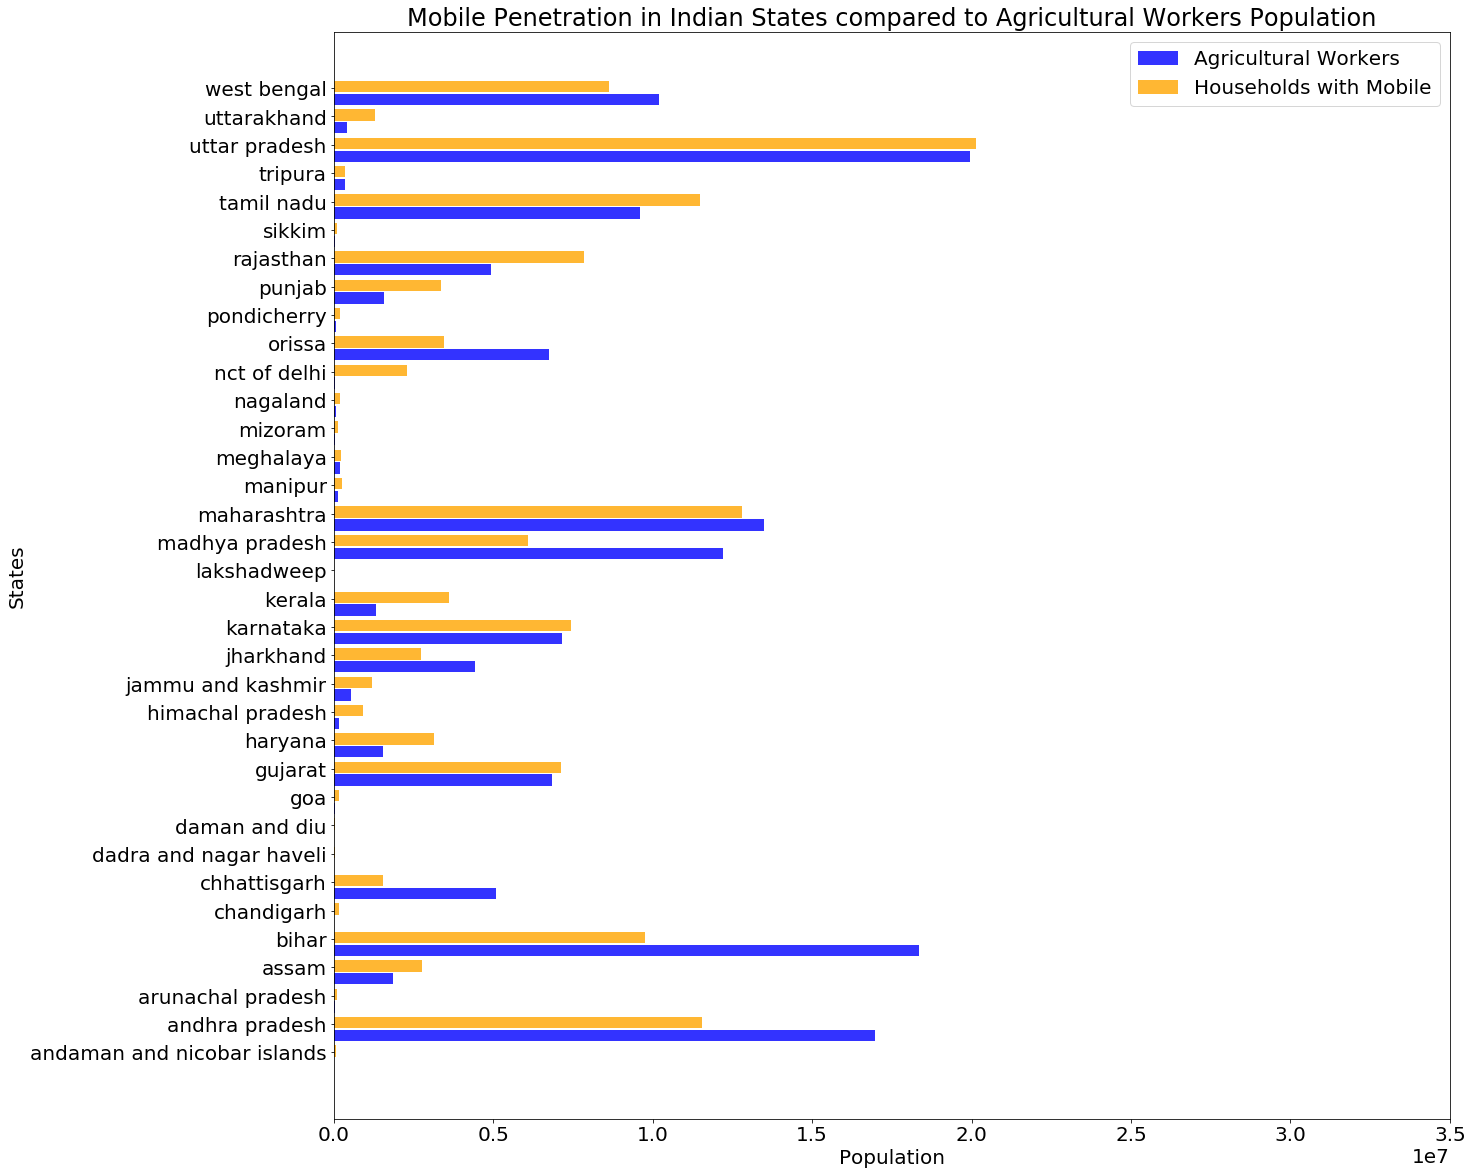

In [250]:
index = np.arange(35)
bar_width = 0.4
opacity = 0.8
plt.xlim(0, 35000000)


agri_data = plt.barh(index, mobile_penetration['Agricultural Workers'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Agricultural Workers')

mobile_data = plt.barh(index+0.45, mobile_penetration['Households with Mobiles'], bar_width,
                 alpha=opacity,
                 color='orange',
                 label='Households with Mobile')

plt.xlabel('Population')
plt.ylabel('States')
plt.title('Mobile Penetration in Indian States compared to Agricultural Workers Population')
plt.yticks(index + bar_width, (i.lower() for i in mobile_penetration['State']))
plt.legend()
 
plt.show()



### The visualization confirms our data story that Andhra Pradesh , Madhya Pradesh, Bihar and Orissa have less mobile penetration rate with respect to agricultutal workers.

# Checking if we can discover factors that influence the literate population

To do this, we have first removed the District Code, District Name and Literate Education from the data, so that there is no data leakage with respect to the liteate population.

We made use of the Random Forest Regressor from the 'sklearn' package to implement a Random Forest Algorithm on the data while regressing on "Literate". 

Even though the results determining the feature importance did not make much sense in the end, I believe that this is a good way to check what factors are most important in influencing the literate population in the country. 

In [34]:
Check what factors drive the number of literates in each state
from sklearn.model_selection import train_test_split
census_data.drop(['District code', 'District name'], axis=1, inplace=True)
census_data.set_index('State name',inplace=True)

Y = census_data['Literate']
X = census_data.drop(['Literate'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
random_forest = rf.fit(X_train,Y_train)

In [36]:
def feature_imp(colNames,imps):
    df = pd.DataFrame(columns=('Feature','Importance'),index=[x for x in range(0,len(colNames))])
    i = 0
    for col in colNames:
        df['Feature'][i] = col
        df['Importance'][i] = imps[i]
        i=i+1
    
    df = df.sort_values(by='Importance',ascending=False)
    return df

feature_imp(X_train.columns,rf.feature_importances_)

,Feature,Importance
4,Female_Literate,0.46392
3,Male_Literate,0.410627
47,Age_Group_30_49,0.035288
43,Literate_Education,0.0263375
12,Male_Workers,0.0174641
89,Household_size_3_to_5_persons_Households,0.01589
105,Power_Parity_Rs_45000_150000,0.0089509
1,Male,0.00558935
95,Married_couples_1_Households,0.0048397
38,Middle_Education,0.00350717
